In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pydataset import data

# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [3]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

# Train Model

In [4]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Fit Model

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Make Predictions

In [6]:
y_pred = knn.predict(X_train)

#### Estimate Probability

In [7]:
y_pred_proba = knn.predict_proba(X_train)

# Evaluate Model

#### Find Accuracy

In [8]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.99


#### Create CM

In [9]:
print(confusion_matrix(y_train, y_pred))

[[28  0  0]
 [ 0 27  1]
 [ 0  0 28]]


#### Create CR

In [10]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.96      0.98        28
   virginica       0.97      1.00      0.98        28

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



# Validate Model

In [11]:
# Use outside data
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.97


In [12]:
y_pred = knn.predict(X_validate)

In [13]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



# Visualize Model

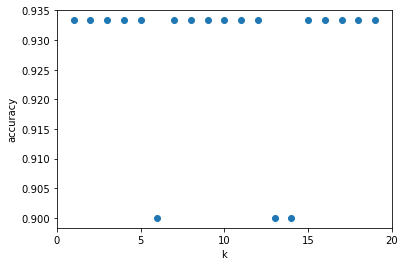

In [14]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()


In [87]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Exercises
#Continue working in your model file with the titanic dataset. 
import aquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df = aquire.get_titanic_data()
df = df.drop(columns='deck')
df = df[~ df.age.isna()]
df = df[~ df.embarked.isna()]
df = df.drop(columns=['embarked', 'class', 'passenger_id', 'age'])
df["is_female"] = df.sex == 1
dummy_df = pd.get_dummies(df[["embark_town"]], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(columns=['sex', 'embark_town'])
df.head() 

,survived,pclass,sibsp,parch,fare,alone,is_female,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,False,0,1
1,1,1,1,0,71.2833,0,False,0,0
2,1,3,0,0,7.9250,1,False,0,1
3,1,1,1,0,53.1000,0,False,0,1
4,0,3,0,0,8.0500,1,False,0,1


In [88]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [89]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 450 to 749
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   398 non-null    int64  
 1   sibsp                    398 non-null    int64  
 2   parch                    398 non-null    int64  
 3   fare                     398 non-null    float64
 4   alone                    398 non-null    int64  
 5   is_female                398 non-null    bool   
 6   embark_town_Queenstown   398 non-null    uint8  
 7   embark_town_Southampton  398 non-null    uint8  
dtypes: bool(1), float64(1), int64(4), uint8(2)
memory usage: 19.8 KB


In [119]:
# Train (Makeing the model)
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [120]:
# 1) Fit a K-Nearest Neighbors classifier to your training sample and transform 
# (i.e. make predictions on the training sample)

# fit
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [121]:
# predictions 
y_pred = knn.predict(X_train)

In [122]:
# estimate prob.
y_pred_proba = knn.predict_proba(X_train)

In [123]:
# 2) Evaluate your results using the model score, confusion matrix, and classification report.
#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.76


In [124]:
# CM
print(confusion_matrix(y_train, y_pred))

[[188  49]
 [ 46 115]]


In [125]:
# CR
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       237
           1       0.70      0.71      0.71       161

    accuracy                           0.76       398
   macro avg       0.75      0.75      0.75       398
weighted avg       0.76      0.76      0.76       398



In [128]:
# 3) Print and clearly label the following: Accuracy, true positive rate, false positive rate, 
# true negative rate, false negative rate, precision, recall, f1-score, and support.
def get_metrics_binary(knn):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = knn.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [105]:
report = get_metrics_binary(knn)


    The accuracy for our model is 0.7613
    The True Positive Rate is 0.714, The False Positive Rate is 0.207,
    The True Negative Rate is 0.793, and the False Negative Rate is 0.286
    


In [129]:
# Validate
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.65


In [130]:
y_pred = knn.predict(X_validate)

In [131]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       102
           1       0.57      0.57      0.57        69

    accuracy                           0.65       171
   macro avg       0.64      0.64      0.64       171
weighted avg       0.65      0.65      0.65       171



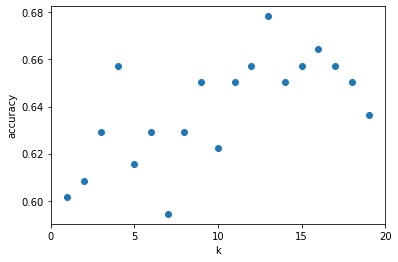

In [132]:
# Vizualize Model
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [133]:
# 4) Run through steps 2-4 setting k to 10
knn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [134]:
# fit
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [135]:
# predictions 
y_pred = knn2.predict(X_train)

In [136]:
# estimate prob.
y_pred_proba = knn2.predict_proba(X_train)

In [137]:
# 2) Evaluate your results using the model score, confusion matrix, and classification report.

#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.73


In [138]:
# CR
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       237
           1       0.73      0.53      0.61       161

    accuracy                           0.73       398
   macro avg       0.73      0.70      0.70       398
weighted avg       0.73      0.73      0.72       398



In [139]:
# Verify 

In [140]:
# Validate
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn2.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.67


In [141]:
y_pred = knn2.predict(X_validate)

In [142]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       102
           1       0.62      0.45      0.52        69

    accuracy                           0.67       171
   macro avg       0.65      0.63      0.63       171
weighted avg       0.66      0.67      0.65       171



In [143]:
# 5) Run through setps 2-4 setting k to 20
knn3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [144]:
# fit
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [145]:
# predictions 
y_pred = knn3.predict(X_train)

In [146]:
# 2) Evaluate your results using the model score, confusion matrix, and classification report.

#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn3.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.69


In [147]:
# CR
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       237
           1       0.69      0.43      0.53       161

    accuracy                           0.69       398
   macro avg       0.69      0.65      0.65       398
weighted avg       0.69      0.69      0.67       398



In [148]:
# Verify 

In [149]:
# Validate
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn3.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.64


In [150]:
y_pred = knn3.predict(X_validate)

In [151]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       102
           1       0.58      0.36      0.45        69

    accuracy                           0.64       171
   macro avg       0.62      0.59      0.59       171
weighted avg       0.63      0.64      0.62       171



In [33]:
# 6) What are the differences in the evaluation metrics? Which performs better on your in-sample 
# data? Why?


In [158]:
# 7) Which model performs best on our out-of-sample data from validate?
y_pred1 = knn.predict(X_validate)
y_pred2 = knn2.predict(X_validate)
y_pred3 = knn3.predict(X_validate)

print(classification_report(y_validate, y_pred1))
print(classification_report(y_validate, y_pred2))
print(classification_report(y_validate, y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       102
           1       0.56      0.39      0.46        69

    accuracy                           0.63       171
   macro avg       0.61      0.59      0.59       171
weighted avg       0.62      0.63      0.62       171

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       102
           1       0.62      0.45      0.52        69

    accuracy                           0.67       171
   macro avg       0.65      0.63      0.63       171
weighted avg       0.66      0.67      0.65       171

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       102
           1       0.58      0.36      0.45        69

    accuracy                           0.64       171
   macro avg       0.62      0.59      0.59       171
weighted avg       0.63      0.64      0.62       171

